# Exploring Variance in Gene Expression Attributable to Tumorness

Here I'm looking at how individual genes seem to be associated with tumorness.  
I then look at how this varries across different tissues.  In our tissues with lower baseline tumorness, this generally seems to be a larger factor explaining variance in expression, whereas those tumors with uniformly high tumorness scores it does not seem to account for as much variability.

In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [27]:
import seaborn as sns
sns.set_context('paper',font_scale=1.5)
sns.set_style('white')

RNA proliferation signature

In [4]:
rna_sig = pd.read_csv('/cellar/users/agross/TCGA_Code/DX/rna_signature.csv',
                      index_col=[0,1], header=None, squeeze=True)
rna_sig = rna_sig[:,1]
rna_sig.index.name = ''

In [5]:
gene_corr = rna_df.xs('01',1,1).ix[:, rna_sig.index].T.corrwith(rna_sig)

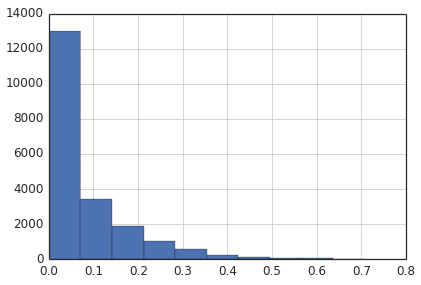

In [48]:
(gene_corr ** 2).hist()

In [11]:
cc = codes.ix[rna_sig.index].dropna().unique()
corr = {}
for c in cc:
    pts = ti(codes == c)
    corr[c] = rna_df.xs('01',1,1).ix[:, pts].T.corrwith(rna_sig.ix[pts])
corr = pd.DataFrame(corr)

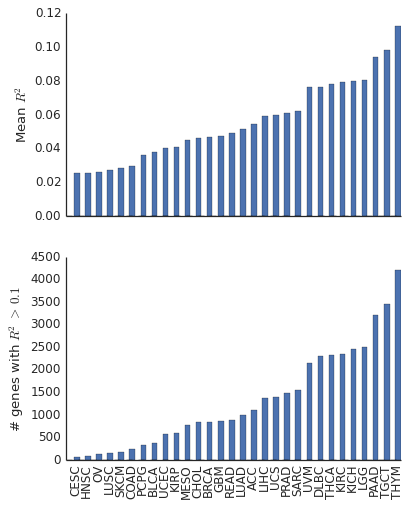

In [29]:
fig, axs = subplots(2,1, figsize=(6,8), sharex=True)
ax = axs[0]
(corr ** 2).mean().order().plot(kind='bar', ax=ax)
ax.set_ylabel('Mean $R^2$')
prettify_ax(ax)

ax = axs[1]
((corr ** 2) > .2).sum().order().plot(kind='bar', ax=ax)
ax.set_ylabel('# genes with $R^2 > \, 0.1$')
prettify_ax(ax)
fig.savefig('/cellar/users/agross/Desktop/Figures/mev.png', dpi=300)

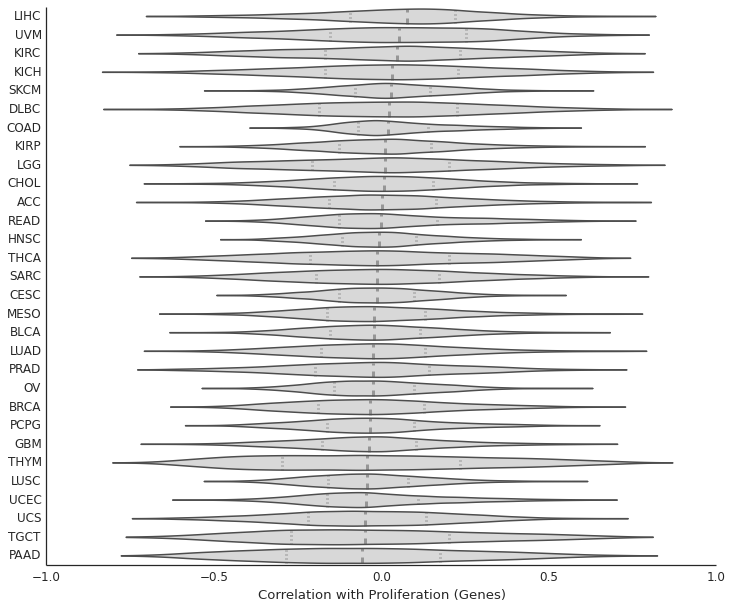

In [43]:
fig, ax = subplots(figsize=(12,10))
o = corr.dropna().median().order().index
sns.violinplot(corr.dropna(), vert=False,
               bw='scott', cut=0, 
               order=o,
               color='grey', alpha=.3,
               inner_kws={'lw':3, 'alpha':1,'color':'black'})
ax.set_xlabel('Correlation with Proliferation (Genes)')
sns.despine(fig)

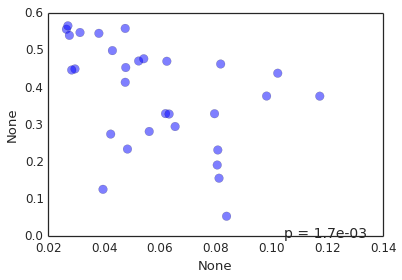

In [57]:
series_scatter((corr.dropna() ** 2).mean(), rna_sig.groupby(codes).median())

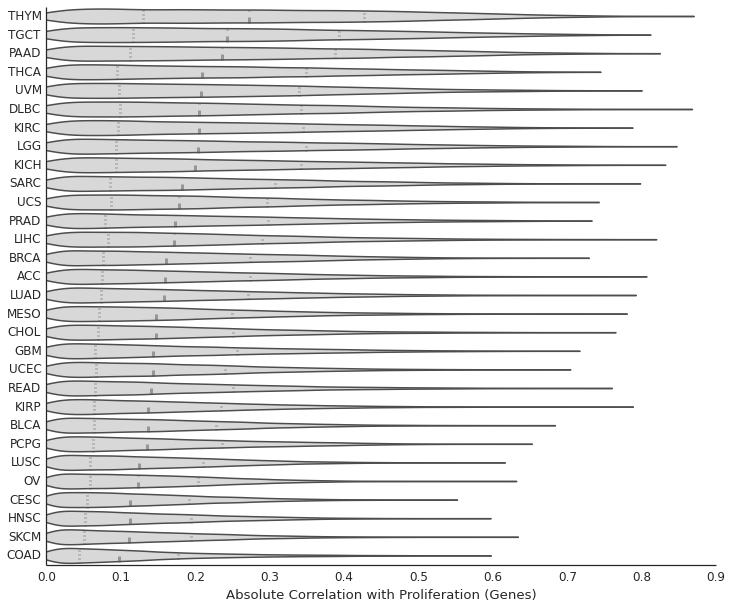

In [47]:
fig, ax = subplots(figsize=(12,10))
o = corr.abs().dropna().median().order().index
sns.violinplot(corr.abs().dropna(), vert=False,
               bw='scott', cut=0, 
               order=o,
               color='grey', alpha=.3,
               inner_kws={'lw':3, 'alpha':1,'color':'black'})
ax.set_xlabel('Absolute Correlation with Proliferation (Genes)')
sns.despine(fig)

### Gene Set Enrichment Analysis of Tumorness Associated Genes

Yes this is a bit circular, but may serve some purpose.

In [61]:
gs2 = gene_sets.ix[gene_corr.index].fillna(0)
v = corr.mean(1).dropna()
rr = screen_feature(v, rev_kruskal, gs2.T, align=False)
fp = (1.*gene_sets.T * v).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

In [62]:
rr.ix[ti(fp > 0)].join(fp).sort('p').head()

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_CELL_CYCLE,380.42,1.01e-84,1.34e-81,0.20
REACTOME_CELL_CYCLE_MITOTIC,324.86,1.26e-72,8.41e-70,0.22
REACTOME_DNA_REPLICATION,293.90,7.03e-66,2.94e-63,0.27
REACTOME_METABOLISM_OF_RNA,293.44,8.84e-66,2.94e-63,0.16
REACTOME_MITOTIC_M_M_G1_PHASES,261.92,6.55e-59,1.74e-56,0.27


In [63]:
rr.ix[ti(fp < 0)].join(fp).sort('p').head()

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,74.60,5.78e-18,1.11e-16,-0.06
KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION,67.86,1.76e-16,3.03e-15,-0.07
KEGG_CALCIUM_SIGNALING_PATHWAY,58.76,1.78e-14,2.55e-13,-0.08
REACTOME_NEURONAL_SYSTEM,56.27,6.32e-14,8.85e-13,-0.06
REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES,44.42,2.65e-11,3.24e-10,-0.07
